# Objective
Analyze application and previous application data to understand customer profiles, identify potential fraud patterns, and visualize important insights related to loan repayment.

# Unit of analysis
Each row in the dataset represents a unique loan application submitted by an individual applicant.

# Data Source & Type: 
Kaggle, it is a semi-structured data (csv)
https://www.kaggle.com/datasets/mishra5001/credit-card/data

- `application_data.csv`: Contains demographic and financial information for each applicant.
  
- `previous_application.csv`: Includes historical loan records submitted by the same applicants.

# Methodologies Implemented:
- Data cleaning and preprocessing: removing high-missing-value columns, encoding categorical variables.
- Merging datasets on a unique identifier (`SK_ID_CURR`).
- Feature engineering (e.g., income brackets, applicant age buckets).
- Exploratory data analysis: comparing fraud vs non-fraud groups.
- Random Forest model for identifying top predictive features.
- Statistical hypothesis testing (Welch's t-test and Chi-square tests).

# Constraints and Caveats:
- Several features had to be dropped due to high null percentages.

# Import Necessary Libraries

In [7]:
# Import the pandas library for data manipulation and analysis
import pandas as pd
# Import matplotlib for creating static visualizations 
import matplotlib.pyplot as plt
# Import seaborn for advanced statistical data visualization 
import seaborn as sns

# Reading Data 
#### The datasets were read using the `pandas` library with `.read_csv()`

In [9]:
# Read the application data & previous application CSV file into a pandas DataFrame
application_data=pd.read_csv("application_data.csv")
previous_application=pd.read_csv("previous_application.csv")

# Shape
#### Displays the number of rows and columns in each dataset to understand their size and structure.

In [11]:
# Check the shape (rows, columns) of the current application data
application_data.shape

(307511, 122)

In [12]:
# Check the shape of the previous application data
previous_application.shape

(1670214, 37)

# Merge Datasets
#### Merges the two datasets based on the common applicant ID (SK_ID_CURR) using an inner join to combine related records.

In [14]:
# Merge application and previous application data on the unique customer ID
merged_data = pd.merge(application_data, previous_application, on='SK_ID_CURR', how='inner')
# Shape of the merged dataset
merged_data.shape

(1413701, 158)

# Data Munging and Processing:

### Drop Null Columns
#### Removes columns that have more than 5000 missing values to reduce noise and maintain data quality.

In [17]:
# Drop columns with more than 5000 missing values
columns_to_drop = merged_data.columns[merged_data.isnull().sum() > 5000]
# Drop them
Final_data = merged_data.drop(columns=columns_to_drop)

### Drop Document Flags
#### Drops unnecessary document-related columns (FLAG_DOCUMENT) that are not useful for fraud analysis.

In [19]:
# Drop all columns that start with "FLAG_DOCUMENT"
Final_data = Final_data.drop(columns=[col for col in Final_data.columns if col.startswith('FLAG_DOCUMENT')])

# Check the shape after dropping
print(Final_data.shape)


(1413701, 67)


### Drops any remaining rows with missing values to ensure a clean dataset for analysis.

In [21]:
# Checking null values
Final_data.isnull().sum().sort_values(ascending=False)

NAME_TYPE_SUITE_x               3526
DEF_60_CNT_SOCIAL_CIRCLE        3146
OBS_30_CNT_SOCIAL_CIRCLE        3146
DEF_30_CNT_SOCIAL_CIRCLE        3146
OBS_60_CNT_SOCIAL_CIRCLE        3146
                                ... 
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START_x       0
HOUR_APPR_PROCESS_START_x          0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
Length: 67, dtype: int64

In [22]:
Final_data.dropna(inplace=True)

In [23]:
Final_data.shape

(1404812, 67)

In [24]:
Final_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle,POS mobile without interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
1413697,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,HC,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,XNA,Card Street
1413698,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low
1413699,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,low_normal,Cash X-Sell: low


In [25]:
Final_data.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'NAME_TYPE_SUITE_x',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START_x',
 'HOUR_APPR_PROCESS_START_x',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_

# Data Evaluation and output

### Class imbalance between fraudulent and non-fraudulent transactions.
#### Description: 
This graph shows that most clients successfully repaid their loans (Not Fraud), while only a small fraction did niot (Fraud), indicating a strong class imbalance in the dataset.
#### Insight:
Fraud cases are much rarer (~8%), which will impact modeling and require special handling.

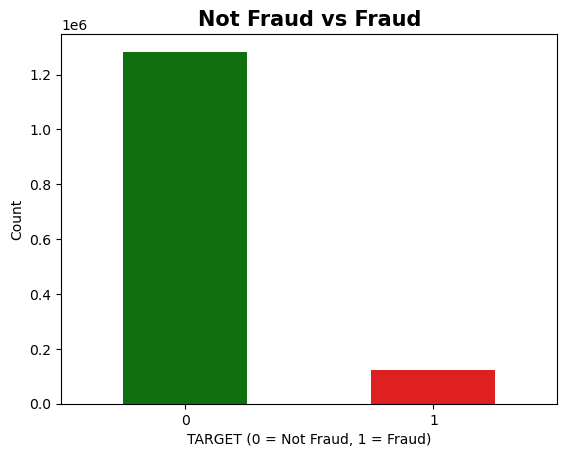

In [28]:
# Create a bar plot for TARGET with custom green and red colors
sns.countplot(x='TARGET', hue='TARGET', data=Final_data, palette={0: 'green', 1: 'red'},  width=0.5, legend=False)

# Set the title and labels
plt.title('Not Fraud vs Fraud', fontsize=15, fontweight='bold')
plt.xlabel('TARGET (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')

# Show plot
plt.show()

### Gender Distribution plot
#### Description:
This graph displays the distribution of loan repayment status across different genders.
Most males and females successfully repaid their loans (green bars), while a smaller proportion have not (red bars).
#### Insight: 
Both genders experience fraud, but females have slightly more applications overall. Gender alone is not a dominant predictor.

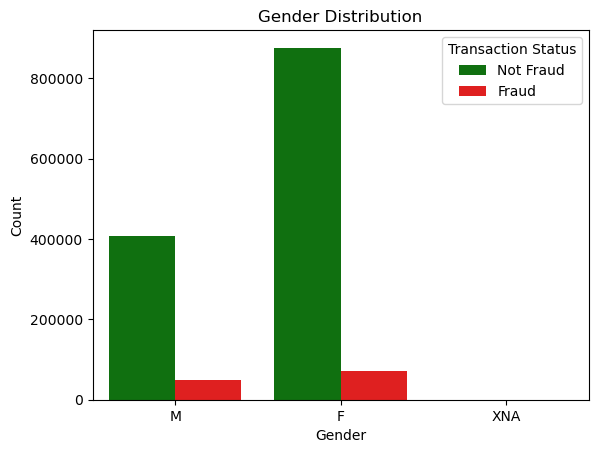

In [30]:
# Plot gender distribution
sns.countplot(x='CODE_GENDER', hue='TARGET', data=Final_data, palette={0: 'green', 1: 'red'}) 

# Set the title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Customize legend
plt.legend(title='Transaction Status', labels=['Not Fraud', 'Fraud'])

# Show plot
plt.show()

### Create Income Group Feature
Helps us understand how income level correlates with fraud rates.

In [32]:
# Create income group based on AMT_INCOME_TOTAL
def income_group(income):
    if income < 50000:
        return 'Very Low'
    elif income < 100000:
        return 'Low'
    elif income < 200000:
        return 'Medium'
    elif income < 400000:
        return 'High'
    else:
        return 'Very High'

# Apply function to create a new column
Final_data['INCOME_GROUP'] = Final_data['AMT_INCOME_TOTAL'].apply(income_group)

# Check distribution
Final_data['INCOME_GROUP'].value_counts()

INCOME_GROUP
Medium       718219
High         403232
Low          233022
Very High     35361
Very Low      14978
Name: count, dtype: int64

### Applicant Income Group Percentage Distribution
#### Description:
This pie chart illustrates the distribution of applicants based on their total income levels.

Applicants are categorized into five groups — Very Low, Low, Medium, High, and Very High, according to their reported income.

#### Insight:
The chart visually highlights the proportion of applicants falling into each income group, helping to understand the overall income profile of the applicant population.

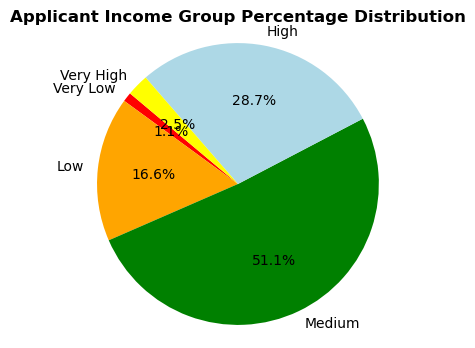

In [34]:
# Pie chart for income group distribution

# Set the pie chart size
plt.figure(figsize=(4,4))

#custom colors
colors = ['red', 'orange', 'Green', 'lightblue', 'Yellow']

# Prepare the income group counts in a specific order
income_counts = Final_data['INCOME_GROUP'].value_counts().reindex(['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Create the pie chart
plt.pie(income_counts, labels=income_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

# Add title to the chart
plt.title('Applicant Income Group Percentage Distribution',fontweight='bold')

# Make sure pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

### Income Group Comparison: Fraud vs Non-Fraud Applicants
#### Description:
The side-by-side pie charts compare the distribution of applicants across different income groups for fraudulent and non-fraudulent transactions.  
Both charts use the same income categories and colors for easier visual comparison.

#### Insights:
This helps identify whether certain income groups have a higher proportion of fraud compared to others.

In [36]:
# Group by INCOME_GROUP and TARGET
income_group_target = Final_data.groupby(['INCOME_GROUP', 'TARGET']).size().unstack()
income_group_target

TARGET,0,1
INCOME_GROUP,,
High,370150,33082
Low,213199,19823
Medium,653138,65081
Very High,32759,2602
Very Low,13867,1111


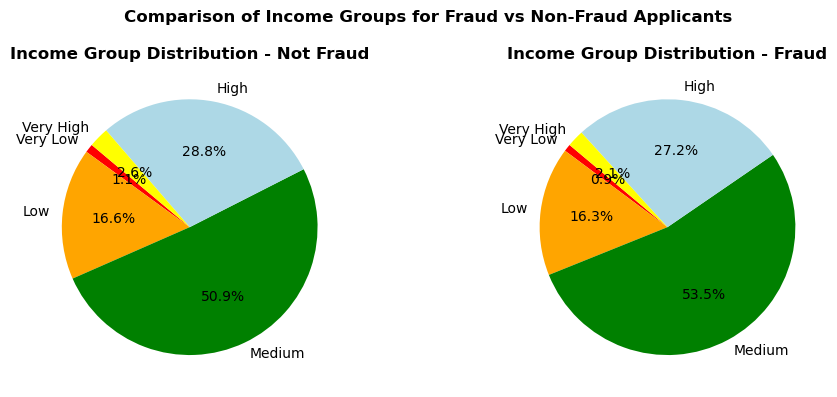

In [37]:
# Separate data: Not Fraud (TARGET = 0) and Fraud (TARGET = 1)
not_fraud = Final_data[Final_data['TARGET'] == 0]['INCOME_GROUP'].value_counts().reindex(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
fraud = Final_data[Final_data['TARGET'] == 1]['INCOME_GROUP'].value_counts().reindex(['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(10,4)) 

# Colors to be consistent across both charts
colors = ['red', 'orange', 'Green', 'lightblue', 'Yellow']

# Plot for Not Fraud
axes[0].pie(not_fraud, labels=not_fraud.index, colors=colors, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Income Group Distribution - Not Fraud', fontweight='bold')

# Plot for Fraud
axes[1].pie(fraud,labels=fraud.index, colors=colors, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Income Group Distribution - Fraud',fontweight='bold')

# Overall title
plt.suptitle('Comparison of Income Groups for Fraud vs Non-Fraud Applicants',fontweight='bold')

# Make the layout tight
plt.tight_layout()
plt.show()


### Fraud vs Not Fraud Percentage by Income Type
#### Insights:
This side-by-side bar chart displays the percentage distribution of fraudulent and non-fraudulent transactions across different applicant income types.  
Each income type shows the proportion of fraud and non-fraud cases, making it easier to compare fraud rates between different categories such as Working, Pensioner, Unemployed, and others.  

#### Insights:
The chart helps identify whether certain income types are more prone to fraudulent behavior.

In [39]:
Final_data['NAME_INCOME_TYPE']

0                       Working
1                 State servant
2                 State servant
3                 State servant
4                       Working
                   ...         
1413696    Commercial associate
1413697    Commercial associate
1413698    Commercial associate
1413699    Commercial associate
1413700    Commercial associate
Name: NAME_INCOME_TYPE, Length: 1404812, dtype: object

In [40]:
# Group by income type and TARGET (0 = repaid, 1 = defaulted)
income_type_target = Final_data.groupby(['NAME_INCOME_TYPE', 'TARGET']).size().unstack().fillna(0)

# Show result
income_type_target

TARGET,0,1
NAME_INCOME_TYPE,,
Commercial associate,293466.0,25907.0
Maternity leave,0.0,16.0
Pensioner,256021.0,15855.0
State servant,87844.0,6008.0
Student,24.0,0.0
Unemployed,56.0,67.0
Working,645702.0,73846.0


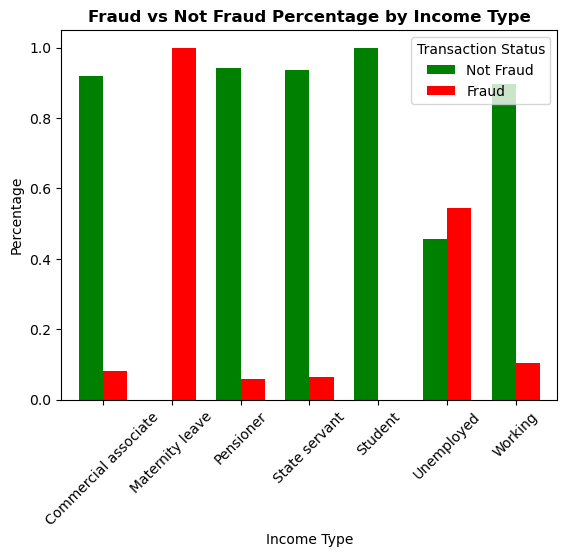

In [41]:
# Normalize rows to get percentage
income_type_target_percent = income_type_target.div(income_type_target.sum(axis=1), axis=0)

# Plot side-by-side bar chart (not stacked)
ax = income_type_target_percent.plot(kind='bar', stacked=False, color=['Green', 'Red'], width=0.7)

# Corrected Title (No Loan Mention)
plt.title('Fraud vs Not Fraud Percentage by Income Type', fontweight='bold')

# Labels
plt.xlabel('Income Type')
plt.ylabel('Percentage')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Update legend
plt.legend(['Not Fraud', 'Fraud'], title='Transaction Status')

# Show plot
plt.show()


### Normalised Credit Score by Fraud Status
#### Description:
The bar chart compares the average EXT_SOURCE_2 score between fraudulent and non-fraudulent applicants.  
#### Insights:
Applicants involved in fraudulent transactions tend to have significantly lower credit scores compared to non-fraudulent applicants, indicating that external risk scores could be a strong predictor of fraud risk.

In [43]:
# Group by EXT_SOURCE_2 and TARGET
grouped = Final_data.groupby('TARGET')['EXT_SOURCE_2'].mean()

# Sort by EXT_SOURCE_2
grouped = grouped.sort_index()

# Display
print(grouped)

TARGET
0    0.520496
1    0.414936
Name: EXT_SOURCE_2, dtype: float64


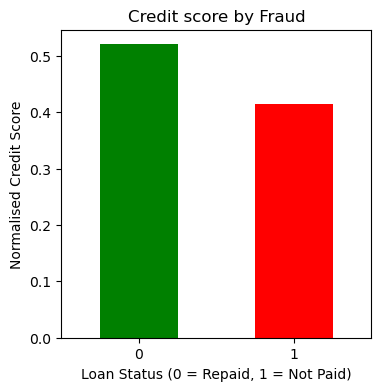

In [44]:
plt.figure(figsize=(4,4))
grouped.plot(kind='bar', color=['Green', 'Red'])
plt.title('Credit score by Fraud')
plt.xlabel('Loan Status (0 = Repaid, 1 = Not Paid)')
plt.ylabel('Normalised Credit Score')
plt.xticks(rotation=0)
plt.show()

In [45]:
Final_data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,POS other with interest,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low,High
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle,POS industry with interest,High
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle,POS household with interest,High
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle,POS mobile without interest,Low


### Correlation Heatmap of Transaction Attributes
The correlation heatmap illustrates the relationships between key numerical attributes of the applicants, including income, credit amount, days of birth, employment duration, and family size.  
The strength and direction of each relationship are represented by color intensity, with positive correlations shown in red and negative correlations in blue.  
#### Insight:
Age, employment duration, and credit amount show meaningful correlations, which can be used for feature selection.

In [47]:
# Select relevant numerical columns
num_cols = [
    'AMT_INCOME_TOTAL', 
    'AMT_CREDIT_x', 
    'DAYS_BIRTH', 
    'DAYS_EMPLOYED', 
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH',
    'SELLERPLACE_AREA',
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS'
    # Add more if you have other numerical features
]

# Subset the data
num_data = Final_data[num_cols]

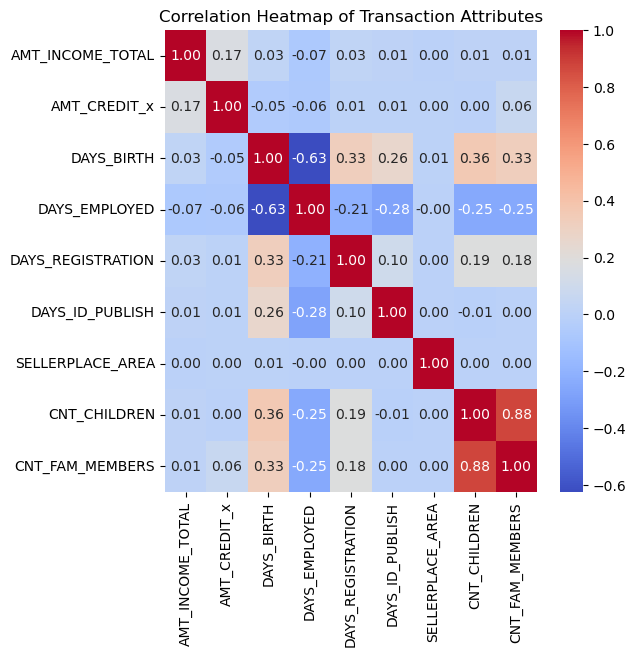

In [48]:
# Calculate correlation matrix
corr_matrix = num_data.corr()

# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Transaction Attributes')
plt.show()

### Top 20 Important Features for Fraud Prediction (Random Forest)
#### Description:
Trains a Random Forest model to predict fraud status based on features.

#### Insight:
Builds a foundation for identifying which variables are most important for detecting fraud.

In [50]:
# Take a random sample
Final_sample = Final_data.sample(n=30000, random_state=42)
# X = features, drop target
X = Final_sample.drop(columns=['TARGET'])  
# y = target
y = Final_sample['TARGET']

In [51]:
from sklearn.preprocessing import LabelEncoder
# Initialize Label Encoder
le = LabelEncoder()

# Encode all object (categorical) columns
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col].astype(str))

### Advanced Package Used

For the advanced part of this project, we implemented the **RandomForestClassifier** from the **`scikit-learn (sklearn)`** library.

- **RandomForestClassifier** is an ensemble learning method based on decision trees.
- It was used to train a model that predicts fraud status (`TARGET` variable) using applicant features.
- It calculates **feature importances**, which helped identify the top predictors of fraud (such as `EXT_SOURCE_2` credit score, applicant age `DAYS_BIRTH`, and credit amount).
- This technique goes beyond basic data analysis by applying **supervised machine learning** to **analyze feature impact** and **support fraud risk modeling**.

**Reason for Choosing RandomForest:**
- It can deal with mixed data types (numerical + categorical).
- It automatically gives feature importance scores without needing manual feature selection.
- It is robust to overfitting on moderately sized datasets.

Thus, RandomForestClassifier served both an **analytical purpose** (understanding important fraud features) and a **modeling purpose** (building a fraud detection framework).


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Train-test split (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Top Feature Importance Plot
#### Description:
Plots the top 20 most important features according to the Random Forest model.

#### Insight:
Credit score (EXT_SOURCE_2) and applicant age (DAYS_BIRTH) are the strongest predictors of fraud.

In [55]:
# Get feature importances
importances = rf.feature_importances_

# Create DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(20))  

                       Feature  Importance
38                EXT_SOURCE_2    0.062794
16                  DAYS_BIRTH    0.042292
18           DAYS_REGISTRATION    0.041898
44                  SK_ID_PREV    0.040947
19             DAYS_ID_PUBLISH    0.040826
0                   SK_ID_CURR    0.039593
54               DAYS_DECISION    0.037956
43      DAYS_LAST_PHONE_CHANGE    0.037764
8                AMT_ANNUITY_x    0.037455
17               DAYS_EMPLOYED    0.036380
7                 AMT_CREDIT_x    0.034270
15  REGION_POPULATION_RELATIVE    0.031189
6             AMT_INCOME_TOTAL    0.030098
9            AMT_GOODS_PRICE_x    0.028153
47                AMT_CREDIT_y    0.027573
30   HOUR_APPR_PROCESS_START_x    0.027157
49   HOUR_APPR_PROCESS_START_y    0.025561
46             AMT_APPLICATION    0.024777
37           ORGANIZATION_TYPE    0.021590
62            SELLERPLACE_AREA    0.020125


Description:
The horizontal bar chart displays the top 20 features ranked by their importance scores from the Random Forest model.  
Features higher on the chart have greater influence in predicting fraudulent transactions.  
This visualization helps prioritize the most impactful applicant and transaction attributes for further analysis and model refinement.

/var/folders/yg/j5b2q7v90zj26thh5m4cznpw0000gn/T/ipykernel_49021/3953480467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')


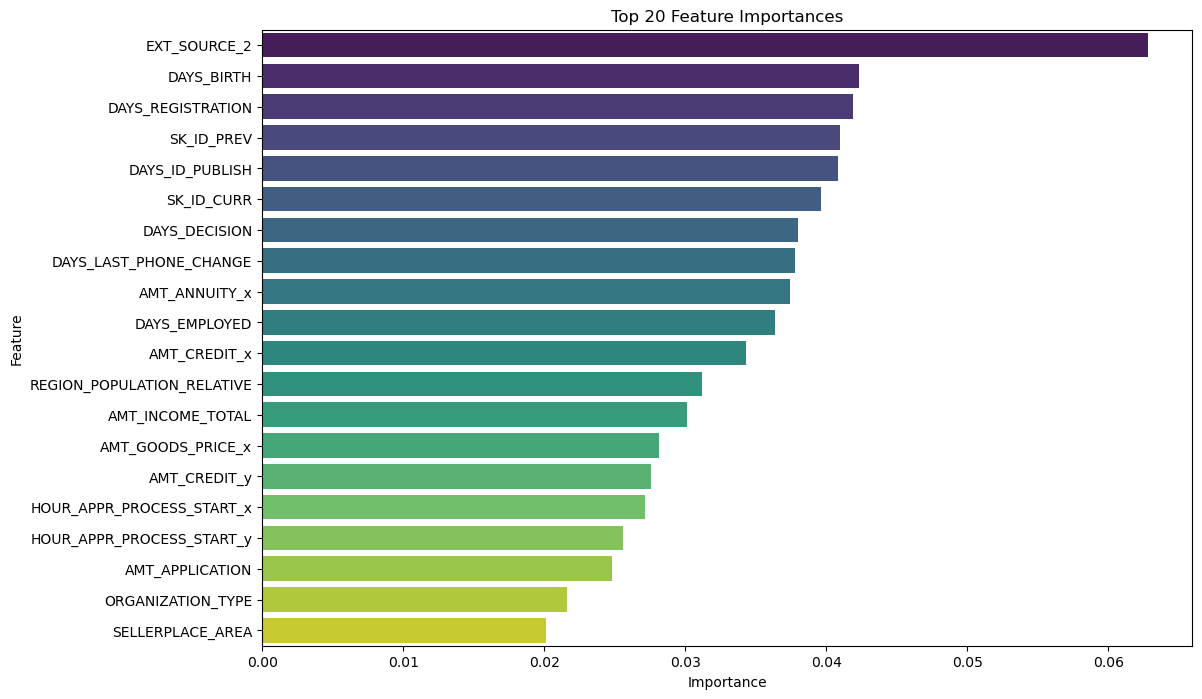

In [57]:
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### From the above graph we can see that EXT_SOURCE_2 features contribute most to fraud occurrences which is the credit score followed by DAYS_BIRTH which means age of the account holder in days

## Statistical Analysis

### Summary statistics
The summary statistics compare key features between fraudulent and non-fraudulent applicants. Differences in means and distributions for variables like credit amount, application amount, and client age suggest potential patterns that could help distinguish fraud from normal loan repayment behavior.

In [61]:
# Group and describe
summary_stats = Final_data.groupby('TARGET')[['AMT_CREDIT_x', 'AMT_ANNUITY_x', 'DAYS_BIRTH', 'AMT_APPLICATION', 'SELLERPLACE_AREA']].describe()

# Transpose for better readability
summary_stats = summary_stats.transpose()

# Display
summary_stats

TARGET                             0             1
AMT_CREDIT_x     count  1.283113e+06  1.216990e+05
                 mean   5.912958e+05  5.587480e+05
                 std    3.888342e+05  3.430571e+05
                 min    4.500000e+04  4.500000e+04
                 25%    2.700000e+05  2.867040e+05
                 50%    5.094000e+05  4.958820e+05
                 75%    8.086500e+05  7.297920e+05
                 max    4.050000e+06  3.020760e+06
AMT_ANNUITY_x    count  1.283113e+06  1.216990e+05
                 mean   2.709444e+04  2.672491e+04
                 std    1.409626e+04  1.236947e+04
                 min    1.615500e+03  2.722500e+03
                 25%    1.671300e+04  1.782900e+04
                 50%    2.493900e+04  2.538450e+04
                 75%    3.460950e+04  3.314700e+04
                 max    2.250000e+05  1.492110e+05
DAYS_BIRTH       count  1.283113e+06  1.216990e+05
                 mean  -1.642318e+04 -1.526282e+04
                 std    4.347128e+03  4.154462e+03
                 min   -2.520100e+04 -2.516800e+04
                 25%   -2.008400e+04 -1.848000e+04
                 50%   -1.617200e+04 -1.474500e+04
                 75%   -1.285500e+04 -1.176650e+04
                 max   -7.489000e+03 -7.678000e+03
AMT_APPLICATION  count  1.283113e+06  1.216990e+05
                 mean   1.758533e+05  1.701008e+05
                 std    2.944090e+05  2.864718e+05
                 min    0.000000e+00  0.000000e+00
                 25%    2.020500e+04  0.000000e+00
                 50%    7.170822e+04  6.665400e+04
                 75%    1.800000e+05  1.800000e+05
                 max    5.850000e+06  3.982500e+06
SELLERPLACE_AREA count  1.283113e+06  1.216990e+05
                 mean   3.206962e+02  2.514990e+02
                 std    8.063575e+03  1.434030e+03
                 min   -1.000000e+00 -1.000000e+00
                 25%   -1.000000e+00 -1.000000e+00
                 50%    4.000000e+00  0.000000e+00
                 75%    9.000000e+01  5.600000e+01
                 max    4.000000e+06  7.462500e+04

### Welch’s T-test 
A Welch’s t-test was conducted to compare the mean credit amount between fraudulent and non-fraudulent applicants.
The resulting p-value indicates whether there is a statistically significant difference between the two groups.

#### Description:
Runs Welch’s t-test to statistically compare feature means between fraud and non-fraud applicants.

#### Insight:

Fraudsters request smaller loans.

Fraudsters have lower monthly installments.

Fraudsters come from lower seller area markets.

### Comparing Mean Credit Amount Between Fraudulent and Non-Fraudulent Applicants
The p-value is 1.09e-213 suggests that the mean credit amounts differ significantly between fraud and non-fraud cases.

The negative t-statistic (-31.2487) 
suggests that the mean credit amount for fraud cases (TARGET = 1) is significantly lower than for non-fraud cases (TARGET = 0). This implies that fraudulent applicants tend to request lower loan amounts on average.

Therefore, 'AMT_CREDIT_x' may serve as a valuable predictor in identifying potential fraud in credit applications.

In [63]:
# Importing the t-test function to compare means between two independent samples 
from scipy.stats import ttest_ind

# Subset of fraudulent applicants
fraud = Final_data[Final_data['TARGET'] == 1]

# Subset of non-fraudulent applicants
nonfraud = Final_data[Final_data['TARGET'] == 0]

# Performing Welch’s t-test to compare the mean credit amount between fraud and non-fraud groups.
t_stat, p_val = ttest_ind(fraud['AMT_CREDIT_x'], nonfraud['AMT_CREDIT_x'], equal_var=False)

# Printing the t-statistic and p-value to evaluate significance.
print(f"T-statistic: {t_stat:}, P-value: {p_val:}")

# p-value < 0.05 implies a significant difference.
if p_val < 0.05:
    print("Result: Significant difference between fraud and non-fraud groups in AMT_CREDIT_x.")
else:
    print("Result: No significant difference between fraud and non-fraud groups in AMT_CREDIT_x.")


T-statistic: -31.24874730414645, P-value: 1.0995386929358896e-213
Result: Significant difference between fraud and non-fraud groups in AMT_CREDIT_x.


### Loan repayment based on installment
The p-value is 8.19e-23, indicating a statistically significant difference in the mean loan installment amount between fraudulent and non-fraudulent groups.

The negative t-statistic means fraud cases tend to have slightly lower annuity (installment) values on average.

Though the difference is not as strong as with credit amount, this still suggests that lower repayment obligations may be associated with fraudulent applications.

In [65]:
# Performing Welch’s t-test to compare the mean loan installment amount (AMT_ANNUITY_x) for fraud and non fraudulent
t_stat_annuity, p_val_annuity = ttest_ind(fraud['AMT_ANNUITY_x'], nonfraud['AMT_ANNUITY_x'], equal_var=False)

# Printing the t-statistic and p-value to evaluate statistical significance
print(f"AMT_ANNUITY_x : T-stat: {t_stat_annuity:}, P-value: {p_val_annuity:}")

# Interpreting the t-test result:
# A p-value < 0.05 suggests a statistically significant difference in the mean loan installment amounts
if p_val_annuity < 0.05:
    print("Result: Significant difference between fraud and non-fraud groups in AMT_ANNUITY_x.")
else:
    print("Result: No significant difference between fraud and non-fraud groups in AMT_ANNUITY_x.")


AMT_ANNUITY_x : T-stat: -9.833585865799, P-value: 8.195834384702361e-23
Result: Significant difference between fraud and non-fraud groups in AMT_ANNUITY_x.


### Seller Location Area (SELLERPLACE_AREA)
A highly significant p-value 3.83e-17 suggests that the average seller location area differs between fraud and non-fraud.

The negative t-statistic indicates that fraudulent transactions are more frequent in areas with lower seller place values.

This geographic factor could reflect fraud clusters in specific market zones and is a strong candidate for a risk indicator feature.


In [67]:
#Performing Welch’s t-test to compare the mean seller location area (SELLERPLACE_AREA) for fraud and non fraudulent
t_stat_seller, p_val_seller = ttest_ind(fraud['SELLERPLACE_AREA'], nonfraud['SELLERPLACE_AREA'], equal_var=False)

# Printing the t-statistic and p-value to evaluate statistical significance
print(f"SELLERPLACE_AREA : T-stat: {t_stat_seller:}, P-value: {p_val_seller:}")

# Interpreting the t-test result:
# A p-value < 0.05 suggests a statistically significant difference in the mean of SELLERPLACE_AREA
if p_val_seller < 0.05:
    print("Result: Significant difference between fraud and non-fraud groups in SELLERPLACE_AREA.")
else:
    print("Result: No significant difference between fraud and non-fraud groups in SELLERPLACE_AREA.")

SELLERPLACE_AREA : T-stat: -8.417905535846998, P-value: 3.837458588587873e-17
Result: Significant difference between fraud and non-fraud groups in SELLERPLACE_AREA.


In [68]:
# Performing Welch’s t-test to compare the mean client age (DAYS_BIRTH) for fraud and non fraudulent
t_stat_birth, p_val_birth = ttest_ind(abs(fraud['DAYS_BIRTH']), abs(nonfraud['DAYS_BIRTH']), equal_var=False)

# Printing the t-statistic and p-value to evaluate statistical significance
print(f"DAYS_BIRTH : T-stat: {t_stat_birth:.4f}, P-value: {p_val_birth:.4f}")


if p_val_birth < 0.05:
    print("Result: Significant difference between fraud and non-fraud groups in DAYS_BIRTH.")
else:
    print("Result: No significant difference between fraud and non-fraud groups in DAYS_BIRTH.")

DAYS_BIRTH : T-stat: -92.7394, P-value: 0.0000
Result: Significant difference between fraud and non-fraud groups in DAYS_BIRTH.


### Result
Based on Welch’s t-tests, there are statistically significant differences between fraudulent and non-fraudulent applicants in terms of credit amount, loan installments, seller location area, and client age. These findings highlight that fraud patterns are associated with specific financial and demographic behaviors, providing valuable insights for further predictive modeling.

### Chi-Square Test for Categorical Features

#### Description:
Performs Chi-square tests to check association between categorical features and fraud.

#### Insight:
Gender, car ownership, and loan type strongly associate with fraud risk.
Different client types have different fraud tendencies.


#### Chi-Square Test Results:
We tested CODE_GENDER, FLAG_OWN_CAR, and NAME_CONTRACT_TYPE_x for association with TARGET.

All three variables showed statistically significant relationships (p-value ≈ 0), indicating that they are highly relevant to the outcome.

**1. Based of gender**:
There is a strong relationship between gender and fraud, with certain genders showing higher fraud rates. 
This makes gender a valuable feature for fraud detection models.

**2. Based on Car Ownership**:
Fraud patterns differ between applicants who own a car and those who don’t, 
suggesting that vehicle ownership may reflect certain behavioral or financial risk characteristics.

**3. Based on type of loan**:
The type of loan contract (e.g., cash loan vs. revolving credit) significantly impacts fraud likelihood. 
Certain contract types are more fraud-prone, making this an important categorical feature

These features are strong candidates for further predictive modeling.

In [72]:
# Import chi-square test
from scipy.stats import chi2_contingency

# List of categorical columns to test
categorical_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE_x']

# Running chi-square tests for each categorical variable
for col in categorical_cols:
    contingency = pd.crosstab(Final_data[col], Final_data['TARGET'])
    chi2, p_val, _, _ = chi2_contingency(contingency)
    print(f"{col} : Chi2 = {chi2:}, P-value = {p_val:}")

CODE_GENDER : Chi2 = 3965.357276849482, P-value = 0.0
FLAG_OWN_CAR : Chi2 = 294.8721777775738, P-value = 4.315019723397891e-66
NAME_CONTRACT_TYPE_x : Chi2 = 1447.9013158751945, P-value = 0.0


#### Chi-Square Test Results:
We tested NAME_CLIENT_TYPE, NAME_PAYMENT_TYPE, and NAME_PORTFOLIO for association with TARGET.

All three variables showed statistically significant relationships (p-value ≈ 0), indicating that they are highly relevant to the outcome.

**1. Based on Client Type**:
There is a strong relationship between the type of client (e.g., working, student, pensioner) and fraud rates.
Different client categories show distinct fraud behaviors, making NAME_CLIENT_TYPE an important feature for fraud detection models.

**2. Based on Payment Type**:
Fraud patterns vary significantly based on the method of payment (e.g., cash through the bank, cashless transfer).
Certain payment types are more associated with fraudulent outcomes, suggesting that NAME_PAYMENT_TYPE captures risk signals useful for prediction.

**3. Based on Portfolio Type**:
The kind of product portfolio (e.g., cards, POS loans, cash loans) also impacts the likelihood of fraud.
Some portfolio types experience higher fraud rates than others, making NAME_PORTFOLIO another valuable variable for predictive modeling.

In [74]:
# Import chi-square test
from scipy.stats import chi2_contingency

# List of new categorical columns to test
categorical_cols = ['NAME_CLIENT_TYPE', 'NAME_PAYMENT_TYPE', 'NAME_PORTFOLIO']

# Running chi-square tests for each categorical variable
for col in categorical_cols:
    contingency = pd.crosstab(Final_data[col], Final_data['TARGET'])
    chi2, p_val, _, _ = chi2_contingency(contingency)
    print(f"{col} : Chi2 = {chi2:}, P-value = {p_val:}")

NAME_CLIENT_TYPE : Chi2 = 304.8149716992803, P-value = 9.02913067234081e-66
NAME_PAYMENT_TYPE : Chi2 = 965.5700164722459, P-value = 5.295610179696169e-209
NAME_PORTFOLIO : Chi2 = 1593.4106312616216, P-value = 0.0


### What Could You Do with This New Insight?

- **Improve Risk Models:**  
  Integrate key fraud indicators (credit score, applicant age, income group) into machine learning models to better predict high-risk loan applications.

- **Enhanced Applicant Screening:**  
  Apply stricter verification checks for younger applicants requesting smaller loans with low credit scores, especially those falling in high-risk income or employment categories.

- **Risk-Based Pricing:**  
  Use risk profiling to adjust loan terms (like interest rates or collateral requirements) dynamically based on fraud likelihood.

- **Operational Efficiency:**  
  Focus fraud investigation resources more strategically by targeting applicants who match high-risk profiles identified from the analysis.

- **Business Insights:**  
  Tailor marketing, credit offerings, and customer relationship strategies based on fraud risk segmentation to reduce overall default rates.

This project’s insights are directly actionable and can significantly strengthen the loan underwriting process for financial institutions.


Younger applicants (~20–30 years) show more fraud instances (colored red), especially in low-to-mid credit ranges.
Higher credit amounts are less frequently associated with fraud.
Jittering helps visually separate overlapping points and reveals dense fraud clusters among younger users.